In [2]:
import os
import shutil
from tqdm import tqdm
import json
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import math
from PIL import Image
from scipy.ndimage import gaussian_filter, map_coordinates

# 데이터셋 구조
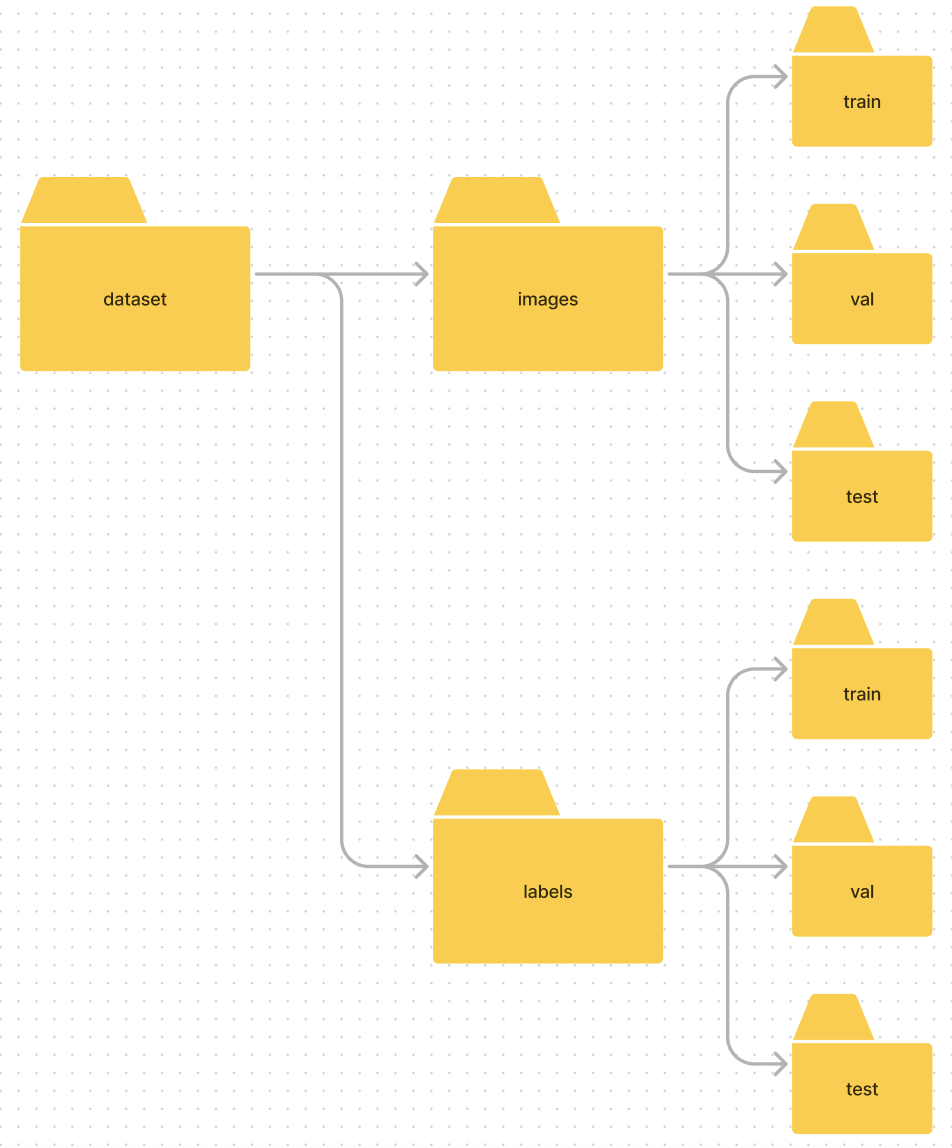


--------------------------------------

# 주의사항
<br>
flip, vertical_flip, rotated90은 라벨링데이터도 변환시켜야 함 

--------------------------------------

# 전처리 과정<br>
전처리는 (이미지 데이터 전처리, 라벨링 데이터 전처리,파일이름 수정)으로 이루어진다.

--------------------------------------

# GrayScaling

In [5]:
# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # Grayscale 전처리
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # 이미지 저장
        cv2.imwrite(output_path, grayscale_image)

print("전처리 완료!")

Processing test: 100%|██████████| 1334/1334 [00:18<00:00, 72.78it/s]

전처리 완료!


In [3]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_black" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_black." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_black" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_black." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# Embossing

In [10]:
# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # 엠보싱 전처리
        kernel_embossing = np.array([[0, -1, -1],
                                     [1, 0, -1],
                                     [1, 1, 0]])
        embossed_image = cv2.filter2D(image, -1, kernel_embossing)

        # 이미지 저장
        cv2.imwrite(output_path, embossed_image)

print("전처리 완료!")

Processing test: 100%|██████████| 1334/1334 [00:28<00:00, 47.24it/s]

전처리 완료!


In [4]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_embossed" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_embossed." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_embossed" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_embossed." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# Invert 명암 반전

In [10]:

# 원본 이미지 디렉토리
original_dir = r'path'

# 반전된 이미지 저장 디렉토리
inverted_dir = r'path'

# 반전된 이미지 크기
image_size = (640, 640)

# 원본 디렉토리 내의 모든 파일에 대해 반전된 이미지 생성 및 저장
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg'):
        # 원본 이미지 경로
        original_path = os.path.join(original_dir, filename)
        
        # 반전된 이미지 파일명
        inverted_filename = f'{filename}'
        
        # 반전된 이미지 저장 경로
        inverted_path = os.path.join(inverted_dir, inverted_filename)
        
        # 이미지 열기
        image = Image.open(original_path)
        
        # 이미지 크기 조정
        image = image.resize(image_size)
        
        # 이미지 명암 반전
        inverted_image = Image.eval(image, lambda x: 255 - x)
        
        # 반전된 이미지 저장
        inverted_image.save(inverted_path)

In [11]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_inverted" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_inverted." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_inverted" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_inverted." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# Blur

In [4]:
# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train']# val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # 블러 전처리
        blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

        # 이미지 저장
        cv2.imwrite(output_path, blurred_image)

print("전처리 완료!")

Processing test: 100%|██████████| 1334/1334 [00:21<00:00, 63.28it/s]

전처리 완료!


In [5]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_blur" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_blur." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_blur" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_blur." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# Binary 이진화

In [24]:

# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # 이진화 전처리
        _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # 이미지 저장
        cv2.imwrite(output_path, binary_image)

print("전처리 완료!")

Processing test: 100%|██████████| 1334/1334 [00:13<00:00, 95.87it/s] 

전처리 완료!


In [6]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_binary" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_binary." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_binary" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_binary." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# noise

In [26]:

# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # 안개 효과 전처리
        noise_intensity = 0.5  # 안개 효과 강도 (조절 가능)
        noise = np.random.normal(size=image.shape).astype(np.uint8)
        noisy_image = cv2.addWeighted(image, 1 - noise_intensity, noise, noise_intensity, 0)

        # 이미지 저장
        cv2.imwrite(output_path, noisy_image)

print("전처리 완료!")

Processing train: 100%|██████████| 1116/1116 [00:57<00:00, 19.42it/s]

전처리 완료!


In [27]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_noise" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_noise." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_noise" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_noise." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# gamma_down

In [11]:
def adjust_gamma(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
    return cv2.LUT(image, table)

# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # 감마값 조절 전처리
        gamma = 0.3  # 감마값 (조절 가능)
        gamma_corrected = adjust_gamma(image, gamma)

        # 이미지 저장
        cv2.imwrite(output_path, gamma_corrected)

print("전처리 완료!")

Processing train: 100%|██████████| 1116/1116 [00:17<00:00, 64.65it/s]

전처리 완료!


In [7]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path' # 대상 폴더 경로 입력

# 이미지 파일에 "_gamma" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_gamma." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_gamma" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_gamma." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# brightness

In [13]:
# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # 밝기 조절 전처리
        brightness_factor = 2.0  # 밝기 조절값 (0.0 ~ 2.0)
        adjusted_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

        # 이미지 저장
        cv2.imwrite(output_path, adjusted_image)

print("전처리 완료!")

Processing train: 100%|██████████| 1116/1116 [00:17<00:00, 63.63it/s]

전처리 완료!


In [ ]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_bright" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_bright." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_bright" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_bright." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

--------------------------------------

# Flip 좌우반전

In [7]:
# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # 좌우 반전 전처리
        flipped_image = cv2.flip(image, 1)

        # 이미지 저장
        cv2.imwrite(output_path, flipped_image)

print("전처리 완료!")

Processing train:   0%|          | 0/279 [00:00<?, ?it/s]

Processing train: 100%|██████████| 279/279 [00:06<00:00, 44.71it/s]


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/GitHub/yolov5m/19_aug/640/images\\val'

In [8]:
# 경로 설정
label_dir = 'path'
output_label_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_label_folder = os.path.join(output_label_dir, folder)
    if not os.path.exists(output_label_folder):
        os.makedirs(output_label_folder)

    label_folder = os.path.join(label_dir, folder)
    label_files = os.listdir(label_folder)

    # 라벨 데이터 파일 전처리
    for label_file in tqdm(label_files, desc=f'Processing {folder}'):
        label_path = os.path.join(label_folder, label_file)
        output_label_path = os.path.join(output_label_folder, label_file)

        # 라벨 데이터 읽기
        with open(label_path, 'r') as f:
            label_data = f.read()

        # 라벨 데이터 좌우 반전 전처리
        flipped_label_data = ''
        labels = label_data.split('\n')
        for label in labels:
            if label:
                label_parts = label.split(' ')
                flipped_x = 1.0 - float(label_parts[1])  # x 좌표 반전
                flipped_label = f"{label_parts[0]} {flipped_x} {label_parts[2]} {label_parts[3]} {label_parts[4]}\n"
                flipped_label_data += flipped_label

        # 라벨 데이터 저장
        with open(output_label_path, 'w') as f:
            f.write(flipped_label_data)

print("전처리 완료!")

Processing train: 100%|██████████| 279/279 [00:00<00:00, 939.39it/s]


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/GitHub/yolov5m/19_aug/640/labels\\val'

In [9]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path' # 대상 폴더 경로 입력

# 이미지 파일에 "_flip" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_flip." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_flip" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_flip." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# vertical flip 상하뒤집기

In [21]:


# 원본 이미지 디렉토리
original_dir = r'path'

# 수직으로 뒤집힌 이미지 저장 디렉토리
flipped_dir = r'path'

# 뒤집힌 이미지 크기
image_size = (640, 640)

# 원본 디렉토리 내의 모든 파일에 대해 이미지를 수직으로 뒤집어서 저장
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg'):
        # 원본 이미지 경로
        original_path = os.path.join(original_dir, filename)
        
        # 뒤집힌 이미지 파일명
        flipped_filename = f'{filename}'
        
        # 뒤집힌 이미지 저장 경로
        flipped_path = os.path.join(flipped_dir, flipped_filename)
        
        # 이미지 열기
        image = Image.open(original_path)
        
        # 이미지 크기 조정
        image = image.resize(image_size)
        
        # 이미지 수직 뒤집기
        flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)
        
        # 뒤집힌 이미지 저장
        flipped_image.save(flipped_path)

In [23]:
import os

# 원본 라벨링 데이터 디렉토리
original_label_dir = r'path'

# 수직으로 뒤집힌 라벨링 데이터 저장 디렉토리
flipped_label_dir = r'path'

# 원본 디렉토리 내의 모든 파일에 대해 라벨링 데이터를 수직으로 뒤집어서 저장
for filename in os.listdir(original_label_dir):
    if filename.endswith('.txt'):
        # 원본 라벨링 데이터 경로
        original_label_path = os.path.join(original_label_dir, filename)
        
        # 뒤집힌 라벨링 데이터 파일명
        flipped_label_filename = f'{filename}'
        
        # 뒤집힌 라벨링 데이터 저장 경로
        flipped_label_path = os.path.join(flipped_label_dir, flipped_label_filename)
        
        # 라벨링 데이터 열기
        with open(original_label_path, 'r') as original_label_file:
            original_lines = original_label_file.readlines()
        
        # 라벨링 데이터 수직 뒤집기
        flipped_lines = []
        for line in original_lines:
            # 라벨과 좌표 정보 분리
            label, x, y, width, height = line.split()
            
            # y 좌표 상하반전
            flipped_y = 1 - float(y)
            
            # 뒤집힌 라벨링 데이터에 추가
            flipped_lines.append(f'{label} {x} {flipped_y} {width} {height}')
        
        # 뒤집힌 라벨링 데이터 저장
        with open(flipped_label_path, 'w') as flipped_label_file:
            flipped_label_file.writelines(flipped_lines)

In [24]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path' # 대상 폴더 경로 입력

# 이미지 파일에 "_vertical" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_vertical." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_flip" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_vertical." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 반시계 90도 회전

In [18]:
# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드
        image = cv2.imread(img_path)

        # 반시계 방향으로 90도 회전
        rotated_image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

        # 이미지 저장
        cv2.imwrite(output_path, rotated_image)

print("전처리 완료!")

Processing train: 100%|██████████| 1116/1116 [00:16<00:00, 65.96it/s]

전처리 완료!


In [19]:
input_dir = 'path'
output_dir = 'path'

folders = ['train'] # val,test 추가 가능

for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    for file in tqdm(files, desc=f'Processing {folder}'):
        label_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        with open(label_path, 'r') as f:
            lines = f.readlines()

        rotated_lines = []
        for line in lines:
            # 라벨 데이터를 공백으로 분리하여 클래스와 바운딩 박스 정보 추출
            data = line.strip().split(' ')
            class_id = data[0]
            x_center = float(data[1])
            y_center = float(data[2])
            width = float(data[3])
            height = float(data[4])

            # 이미지 크기를 640x640 기준에서 반시계 방향으로 90도 회전시키기
            new_x_center = y_center
            new_y_center = 1 - x_center
            new_width = height
            new_height = width

            # 회전된 바운딩 박스 정보를 다시 라벨링 형식으로 조합
            rotated_line = f'{class_id} {new_x_center} {new_y_center} {new_width} {new_height}'
            rotated_lines.append(rotated_line)

        with open(output_path, 'w') as f:
            f.write('\n'.join(rotated_lines))

print("전처리 완료!")


Processing train: 100%|██████████| 1116/1116 [00:01<00:00, 988.48it/s] 

전처리 완료!


In [20]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path' # 대상 폴더 경로 입력

# 이미지 파일에 "_rotated90" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_rotated90." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_rotated90" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_rotated90." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# elastic transformation

In [20]:
def elastic_transform(image, alpha, sigma, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape[:2]) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape[:2]) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))

    distorted_image = map_coordinates(image, indices, order=1, mode='reflect')
    distorted_image = distorted_image.reshape(shape)

    return distorted_image

# 경로 설정
input_dir = 'path'
output_dir = 'path'

# 폴더명 설정
folders = ['train'] # val,test 추가 가능

# 폴더 생성
for folder in folders:
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    input_folder = os.path.join(input_dir, folder)
    files = os.listdir(input_folder)

    # 이미지 파일 전처리
    for file in tqdm(files, desc=f'Processing {folder}'):
        img_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        # 이미지 로드 (그레이스케일로 변환)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Elastic Transform 전처리
        alpha = 50  # alpha 값 (조절 가능)
        sigma = 10  # sigma 값 (조절 가능)
        elastic_transformed = elastic_transform(image, alpha=alpha, sigma=sigma)

        # 이미지 저장
        cv2.imwrite(output_path, elastic_transformed)

print("전처리 완료!")

Processing train: 100%|██████████| 1116/1116 [01:57<00:00,  9.46it/s]

전처리 완료!


In [21]:
# 전처리된 이미지, 라벨링 데이터 이름 바꾸기

folder_path = r'path'  # 대상 폴더 경로 입력

# 이미지 파일에 "_elastic" 추가
image_folder = os.path.join(folder_path, "images")
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_elastic." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))

# 라벨 파일에 "_elastic" 추가
label_folder = os.path.join(folder_path, "labels")
for subfolder in os.listdir(label_folder):
    subfolder_path = os.path.join(label_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)):
                new_filename = filename.split(".")[0] + "_elastic." + filename.split(".")[1]
                os.rename(os.path.join(subfolder_path, filename), os.path.join(subfolder_path, new_filename))